<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>Basic CNN</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.2.0'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
# Download the mnist dataset using keras
(train_datas, train_labels), (test_datas, test_labels) = datasets.cifar10.load_data()
train_datas.shape, train_labels.shape, test_datas.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_labels, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

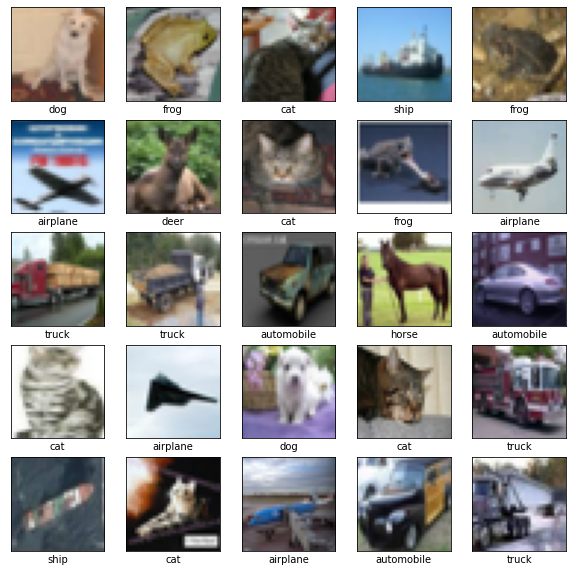

In [7]:
# To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for idx, idx_img in enumerate(np.random.randint(0, 4999, 25)):
    plt.subplot(5, 5, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_datas[idx_img])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[idx_img][0]])
plt.show()

# Create Model

In [8]:
# Normalize pixel values to be between 0 and 1
train_datas, test_datas = train_datas / 255, test_datas / 255

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

In [10]:
# Let's display the architecture of our model so far.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

Add Dense layers on top
> To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

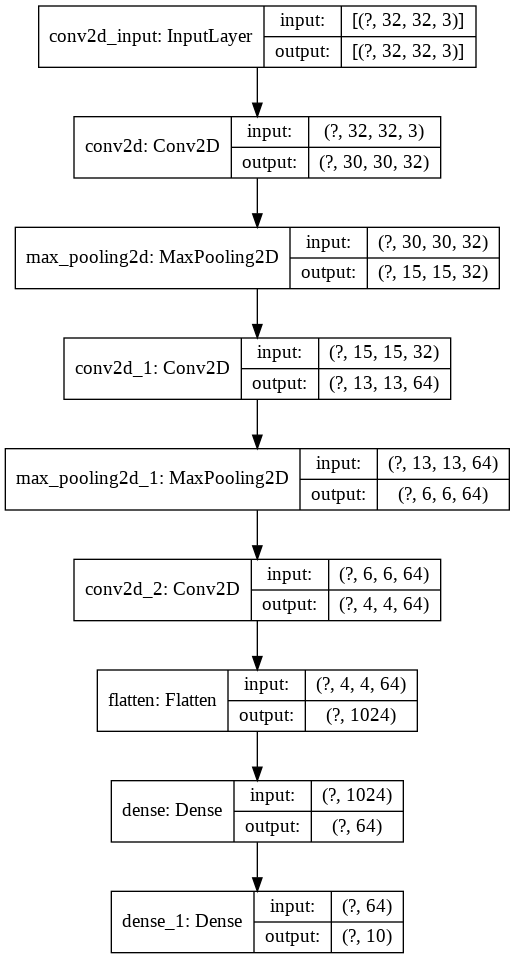

In [12]:
utils.plot_model(model, "intermediate/model.png", True)

# Compile & Learning

In [13]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [14]:
history = model.fit(
    train_datas, train_labels,
    validation_data=(test_datas, test_labels),
    batch_size=256,
    epochs=10
)

Epoch 1/10
196/196 [==============================] - 16s 79ms/step - loss: 1.7610 - accuracy: 0.3594 - val_loss: 1.4637 - val_accuracy: 0.4663
Epoch 2/10
196/196 [==============================] - 16s 80ms/step - loss: 1.3836 - accuracy: 0.5036 - val_loss: 1.3048 - val_accuracy: 0.5355
Epoch 3/10
196/196 [==============================] - 15s 79ms/step - loss: 1.2571 - accuracy: 0.5525 - val_loss: 1.2111 - val_accuracy: 0.5592
Epoch 4/10
196/196 [==============================] - 16s 82ms/step - loss: 1.1631 - accuracy: 0.5885 - val_loss: 1.1344 - val_accuracy: 0.5979
Epoch 5/10
196/196 [==============================] - 16s 80ms/step - loss: 1.0927 - accuracy: 0.6163 - val_loss: 1.1159 - val_accuracy: 0.5963
Epoch 6/10
196/196 [==============================] - 16s 80ms/step - loss: 1.0349 - accuracy: 0.6372 - val_loss: 1.0477 - val_accuracy: 0.6329
Epoch 7/10
196/196 [==============================] - 15s 78ms/step - loss: 0.9781 - accuracy: 0.6579 - val_loss: 1.0279 - val_accuracy:

In [15]:
test_scores = model.evaluate(test_datas, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.9522 - accuracy: 0.6700
Test loss: 0.9522128105163574
Test accuracy: 0.6700000166893005


<AxesSubplot:>

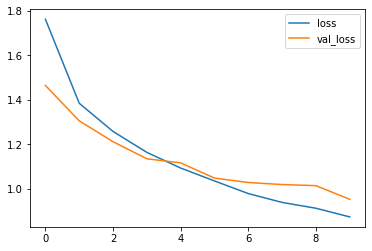

In [16]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

<AxesSubplot:>

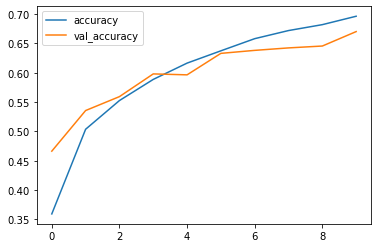

In [17]:
history_df[["accuracy", "val_accuracy"]].plot()

# Save And Serialize

Saving the model and serialization work the same way for models built using the functional API as they do for Sequential models. The standard way to save a functional model is to call model.save() to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

* This saved file includes the:
    - model architecture
    - model weight values (that were learned during training)
    - model training config, if any (as passed to compile)
    - optimizer and its state, if any (to restart training where you left off)

In [18]:
model.save("intermediate/mnist.h5")
del model

In [19]:
# Recreate the exact same model purely from the file:
model = models.load_model("intermediate/mnist.h5")

In [20]:
test_scores = model.evaluate(test_datas, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.9522 - accuracy: 0.6700
Test loss: 0.9522128105163574
Test accuracy: 0.6700000166893005
